# <center>Experiment II --- Dip into the core algorithm in GeoD: Line Search</center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time
from Loss_and_Optimizer import *

# Comparing optimizers

In [3]:
def create_ops():
    """
    Obtain optimizers of four different line search method
    
    Returns
    -----------
    Ops: list, len(Ops) = 4
       Contain four functions representing four different line search method
    """    
    line_search_set = ['full', 'quarter', 'one-third full', 'one-third quarter']
    Ops = [Geo(line_search_method = method) for method in line_search_set]
    return Ops

In [4]:
# Get the name of each optimizer
line_search_set = ['full', 'quarter', 'one-third full', 'one-third quarter']
Ops_name = ['Geo ' + i for i in line_search_set]
Ops_name

['Geo full', 'Geo quarter', 'Geo one-third full', 'Geo one-third quarter']

## Linear Regression

Simulate the data \
beta_ture: array, len(beta_ture) = 2, follow a normal distribution $N(1,4)$ \
X: array, X.shape = [300,2], follow a normal distribution $N(2,9)$ \
eps: array, len(eps) = 300,  follow a normal distribution $N(0,1)$ \
y: array, len(y) = 300, the value of responsible variable

In [4]:
np.random.seed(30)
beta_true = np.random.normal(1,2,2)
X = np.random.normal(2, 3, (300,2))
eps = np.random.normal(0,1,300)
y = X @ beta_true + eps 
beta_true

array([-1.52810533,  4.0558107 ])

In [5]:
# Choose mean squared loss function for linear regression problem
loss = Mean_squared_error()

In [6]:
# Set iteration = 300, calculate the MSE and cumulative running time of each iteration for each optimizer
Ops = create_ops()
MSEs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        y_pre = X @ params 
        MSEs[i].append(Op.get_loss_value(loss, X, y, params))
        Times[i].append(cumulative_time)

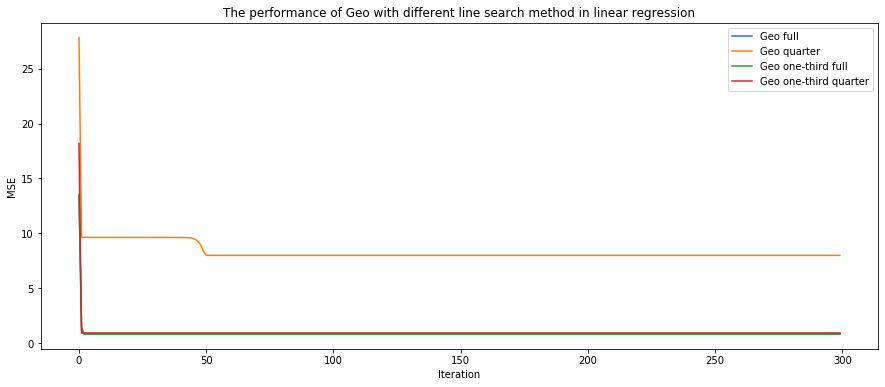

In [7]:
# plot the MSE with iteration over different optimizer.
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, MSEs[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('The performance of Geo with different line search method in linear regression')
plt.show()

#### Conclusion
As we can see from the plot, in mean square loss function case, Geo full, Geo one-third full and Geo one-third quarter have the similar good performances. However, Geo quarter has the bad performance in terms of MSE. Intuitively speaking, it is hard for Geo quarter and Geo one-third quarter to achieve the same level with the other 2 Geo modifications given a limited number of points we search from.  

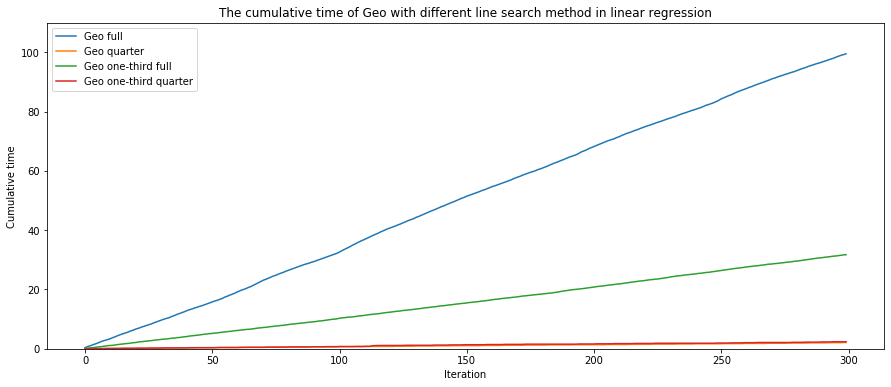

In [8]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.title('The cumulative time of Geo with different line search method in linear regression')
plt.ylim(0, 110)
plt.show()

#### Conclusion
From the plot, we can observe that the cumulative running time is proportioned to the points used in line search method. In other words, the cumulative time gets higher with more points in lienar search.

In [9]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 99.46875s.
The cumulative time of 300 iteration for Geo quarter is 2.125s.
The cumulative time of 300 iteration for Geo one-third full is 31.734375s.
The cumulative time of 300 iteration for Geo one-third quarter is 2.375s.


## Classification

Simulate the data \
beta_ture: array, len(beta_ture) = 2, follow a normal distribution $N(1,4)$  \
X: array, X.shape = [100,2], follow a normal distribution $N(2,9)$ \
eps: array, len(eps) = 100, follow a normal distribution $N(0,1)$ \
y: array, len(y) = 100, the value of responsible variable only containing 1 and -1 

In [5]:
np.random.seed(30)
beta_true = np.random.normal(1,4,2)
X = np.random.normal(2, 3, (100,2))
eps = np.random.normal(0,1,100)
y = 2*(X @ beta_true + eps > 0)-1
beta_true

array([-4.05621066,  7.11162141])

### Hinge

In [11]:
# Choose hinge loss function for classfication problem
loss = Hinge(False, 1)

In [12]:
# Set iteration = 300, calculate the empirical risk, accuracy and cumulative running time of each iteration for each optimizer
LOSS = [[], [], [], []]
ACUs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
Ops = create_ops()

for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        LOSS[i].append(Op.get_loss_value(loss, X, y, params))
        y_pre = 2*(X @ params > 0)-1
        ACUs[i].append( sum(y_pre == y)/len(y))
        Times[i].append(cumulative_time)

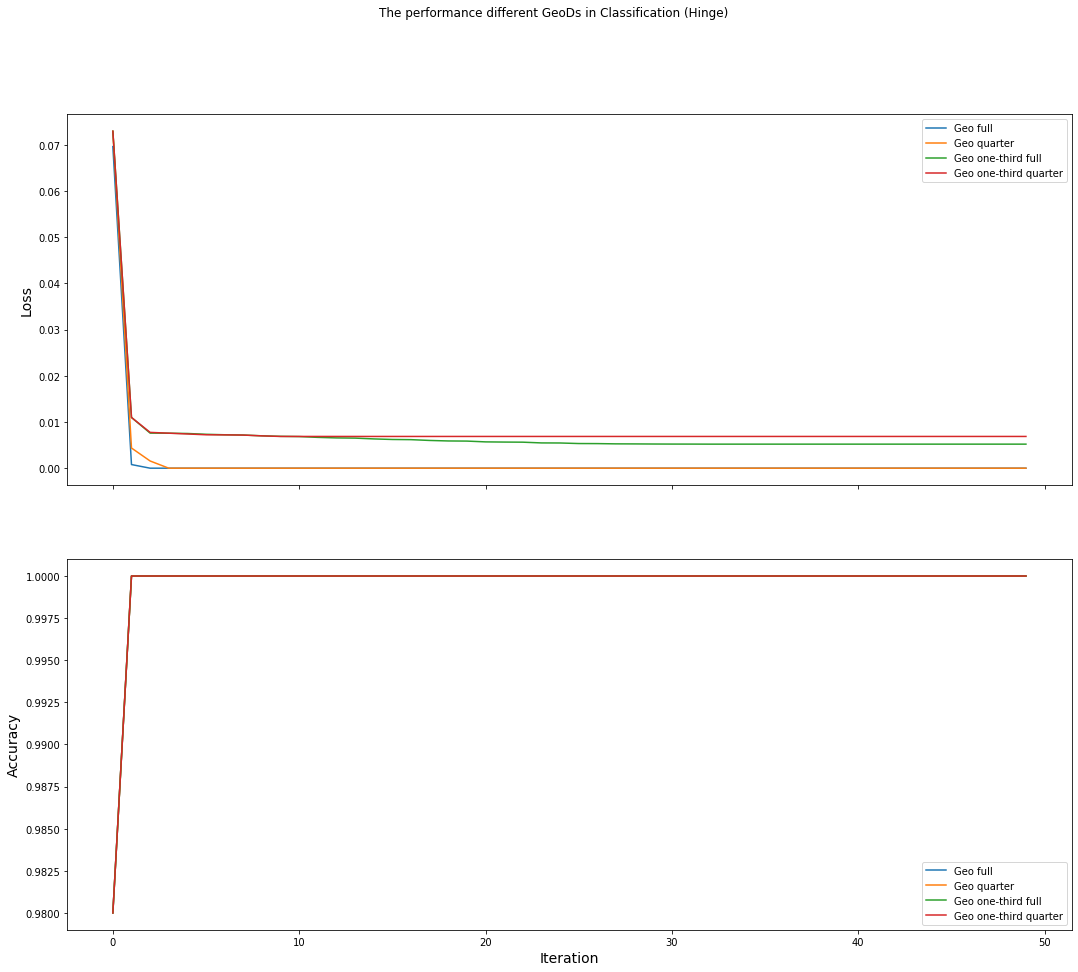

In [13]:
# plot the empirical risk and accuracy with iteration over different optimizer respectively
fig, axes = plt.subplots(2, sharex=True, figsize=(18, 15))
fig.suptitle('The performance different GeoDs in Classification (Hinge)')
cord = np.arange(0, 50, 1)

axes[0].set_ylabel("Loss", fontsize=14)
for i in range(4):
    axes[0].plot(cord, LOSS[i][:50])
axes[0].legend(Ops_name)    

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
for i in range(4):
    axes[1].plot(cord, ACUs[i][:50])
axes[1].legend(Ops_name)    
    
plt.show()

#### Conclusion 
In hinge loss function case, these four line search methods have the similar performance in both l2 norm of difference of beta and ture beta, and accuracy.

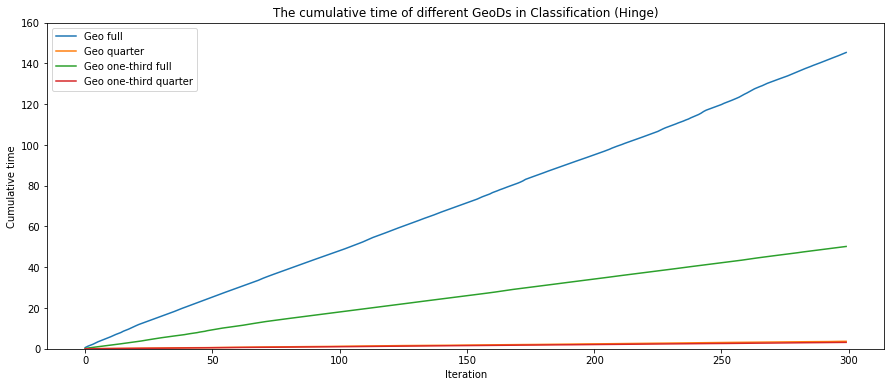

In [14]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.title('The cumulative time of different GeoDs in Classification (Hinge)')
plt.ylim(0, 160)
plt.show()

#### Conclusion
From the plot, we can observe that the cumulative running time is proportioned to the points used in line search method. In other words, the cumulative time gets higher with more points in lienar search.

In [15]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 145.359375s.
The cumulative time of 300 iteration for Geo quarter is 3.671875s.
The cumulative time of 300 iteration for Geo one-third full is 50.203125s.
The cumulative time of 300 iteration for Geo one-third quarter is 3.15625s.


### Quadratic_hinge

In [6]:
# Choose quadratic hinge loss function for classfication problem
loss = Quadratic_hinge(False, 1)

In [7]:
# Set iteration = 300, calculate the empirical risk, accuracy and cumulative running time of each iteration for each optimizer
LOSS = [[], [], [], []]
ACUs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
Ops = create_ops()

for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        LOSS[i].append(Op.get_loss_value(loss, X, y, params))
        y_pre = 2*(X @ params > 0)-1
        ACUs[i].append( sum(y_pre == y)/len(y))
        Times[i].append(cumulative_time)

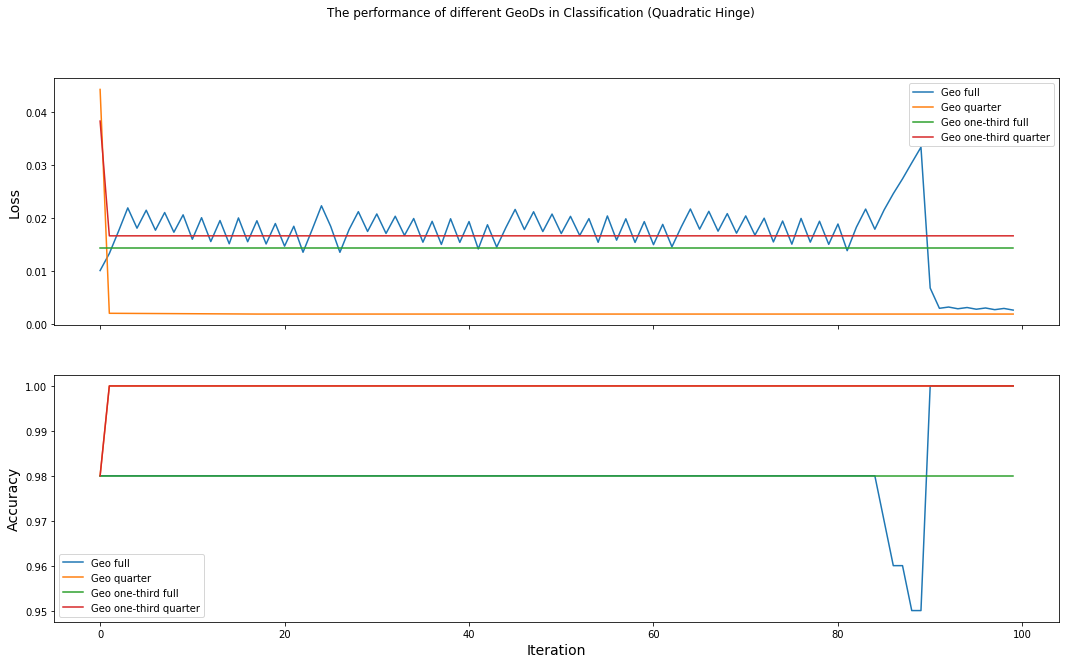

In [26]:
# plot the empirical risk and accuracy with iteration over different optimizer respectively
fig, axes = plt.subplots(2, sharex=True, figsize=(18, 10))
fig.suptitle('The performance of different GeoDs in Classification (Quadratic Hinge)')
cord = np.arange(0, 100, 1)

axes[0].set_ylabel("Loss", fontsize=14)
for i in range(4):
    axes[0].plot(cord, LOSS[i][:100])
axes[0].legend(Ops_name)    

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
for i in range(4):
    axes[1].plot(cord, ACUs[i][:100])
axes[1].legend(Ops_name)    
    
plt.show()

#### Conclusion
In the quadratic loss function case, Geo full has the best performance with highest accuaracy and smallest loss. Morover, Geo one-third full has the moderate performance ,and Geo quarter and Geo one-third quarter have the worst performance. It indicates accuracy gets higher with more points used in the line search. 

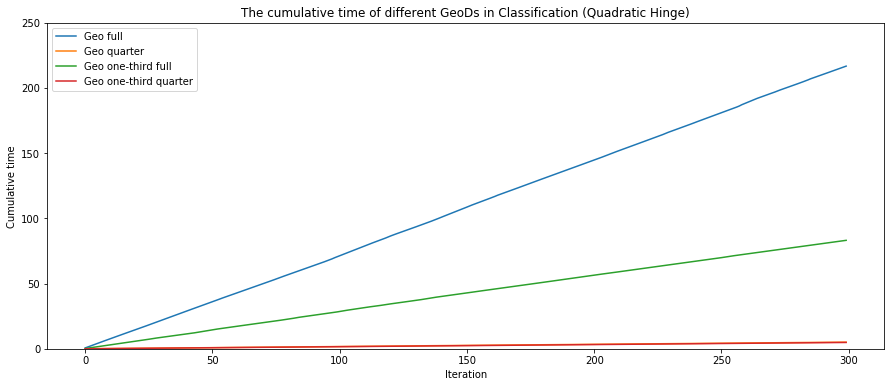

In [19]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.title('The cumulative time of different GeoDs in Classification (Quadratic Hinge)')
plt.ylim(0, 250)
plt.show()

#### Conclusion
From the plot, we can observe that the cumulative running time is proportioned to the points used in line search method. In other words, the cumulative time gets higher with more points in lienar search.

In [20]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 216.671875s.
The cumulative time of 300 iteration for Geo quarter is 5.109375s.
The cumulative time of 300 iteration for Geo one-third full is 83.140625s.
The cumulative time of 300 iteration for Geo one-third quarter is 4.859375s.


### Smooth_hinge

In [21]:
# Choose smooth hinge loss function for classfication problem
loss = Smooth_hinge(False, 1)

In [22]:
# Set iteration = 300, calculate the empirical risk, accuracy and cumulative running time of each iteration for each optimizer
LOSS = [[], [], [], []]
ACUs = [[], [], [], []]
Times = [[], [], [], []]
T = 300
Ops = create_ops()

for i, Op in enumerate(Ops):
    cumulative_time = 0
    params = [0,0]
    for j in range(T):
        start_time = process_time()
        updates = Op.get_updates(loss, X, y, params)
        params = [p + u for p, u in zip(params, updates)]
        end_time = process_time()
        cumulative_time += (end_time - start_time)
        LOSS[i].append(Op.get_loss_value(loss, X, y, params))
        y_pre = 2*(X @ params > 0)-1
        ACUs[i].append( sum(y_pre == y)/len(y))
        Times[i].append(cumulative_time)

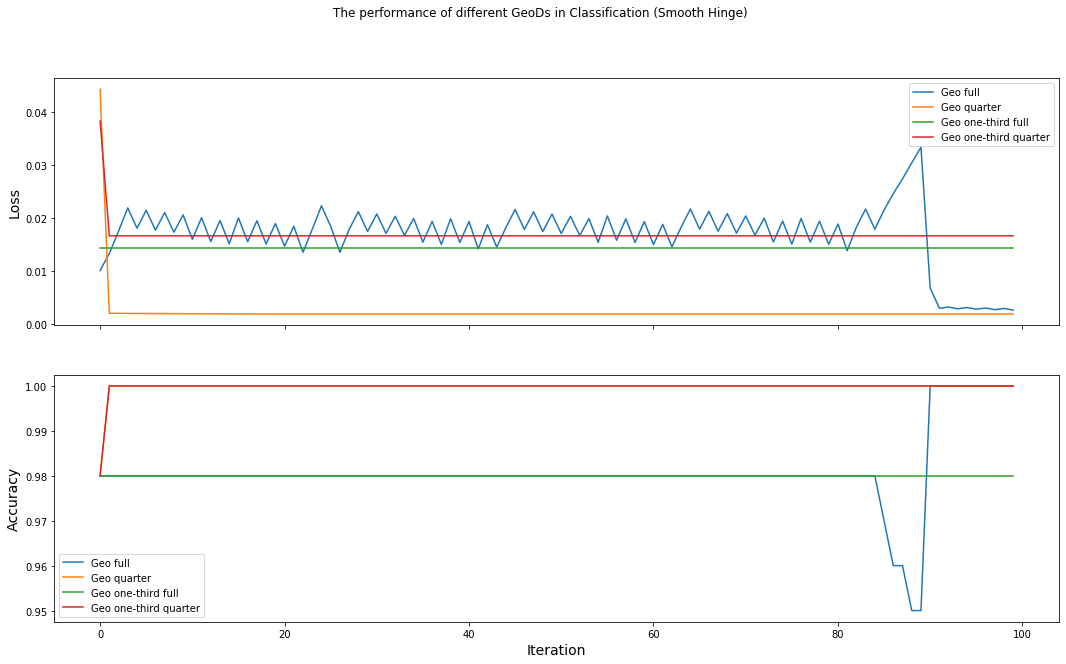

In [23]:
# plot the empirical risk and accuracy with iteration over different optimizer respectively
fig, axes = plt.subplots(2, sharex=True, figsize=(18, 10))
fig.suptitle('The performance of different GeoDs in Classification (Smooth Hinge)')
cord = np.arange(0, 100, 1)

axes[0].set_ylabel("Loss", fontsize=14)
for i in range(4):
    axes[0].plot(cord, LOSS[i][:100])
axes[0].legend(Ops_name)    

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Iteration", fontsize=14)
for i in range(4):
    axes[1].plot(cord, ACUs[i][:100])
axes[1].legend(Ops_name)    
    
plt.show()

#### Conclusion 
From the plots, we observe that Geo full, Geo quarter and Geo one-third quarter have better performance compared with Geo one-third full.

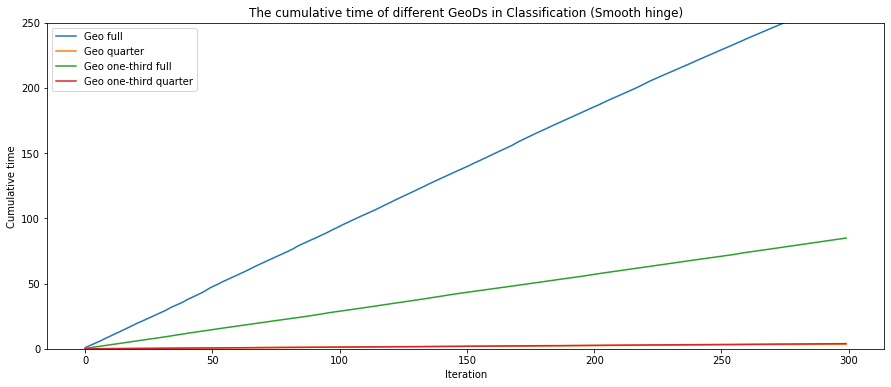

In [24]:
# plot the cumulative running time with iteration over different optimizer
plt.figure(figsize=(15,6))
cord = np.arange(0, 300, 1)
for i in range(4):
    plt.plot(cord, Times[i])
plt.legend(Ops_name[:4])
plt.xlabel('Iteration')
plt.ylabel('Cumulative time')
plt.title('The cumulative time of different GeoDs in Classification (Smooth hinge)')
plt.ylim(0, 250)
plt.show()

#### Conclusion
From the plot, we can observe that the cumulative running time is proportioned to the points used in line search method. In other words, the cumulative time gets higher with more points in lienar search.

In [25]:
for i in range(4):
    print('The cumulative time of 300 iteration for {} is {}s.'.format(Ops_name[i], Times[i][-1]))

The cumulative time of 300 iteration for Geo full is 270.671875s.
The cumulative time of 300 iteration for Geo quarter is 3.59375s.
The cumulative time of 300 iteration for Geo one-third full is 84.890625s.
The cumulative time of 300 iteration for Geo one-third quarter is 3.96875s.
